In [1]:
import pandas as np
data = np.read_csv("/content/tested.csv")
print(data)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  \
0      male  34.5      0      0

In [2]:
data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

In [3]:
data["Age"]=data["Age"].fillna(0)
data["Fare"]=data["Fare"].fillna(0)
data["Cabin"]=data["Cabin"].fillna("0")

In [4]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Name"]=b.fit_transform(data["Name"])
data["Sex"]=b.fit_transform(data["Sex"])
data["Ticket"]=b.fit_transform(data["Ticket"])
data["Cabin"]=b.fit_transform(data["Cabin"])
data["Embarked"]=b.fit_transform(data["Embarked"])
data["Name"]=b.fit_transform(data["Name"])

In [5]:
print(data)

     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
0            892       3   206    1  34.5      0      0     152    7.8292   
1            893       3   403    0  47.0      1      0     221    7.0000   
2            894       2   269    1  62.0      0      0      73    9.6875   
3            895       3   408    1  27.0      0      0     147    8.6625   
4            896       3   178    0  22.0      1      1     138   12.2875   
..           ...     ...   ...  ...   ...    ...    ...     ...       ...   
413         1305       3   353    1   0.0      0      0     267    8.0500   
414         1306       1   283    0  39.0      0      0     324  108.9000   
415         1307       3   332    1  38.5      0      0     346    7.2500   
416         1308       3   384    1   0.0      0      0     220    8.0500   
417         1309       3   302    1   0.0      1      1     105   22.3583   

     Cabin  Embarked  Survived  
0        0         1         0  
1        

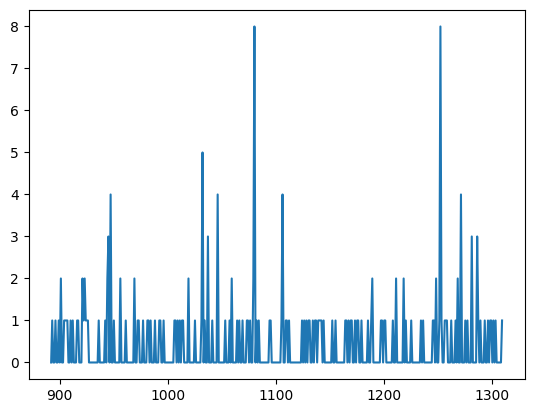

In [6]:
from matplotlib import pyplot as plt
plt.plot(data["PassengerId"],data["SibSp"])

In [7]:
x=data.drop("Survived",axis=1)
y=data["Survived"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)
print(xtrain)
print(ytrain)

     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
215         1107       1   169    1  42.0      0      0       9   42.5000   
370         1262       2   156    1  21.0      1      0     124   11.5000   
369         1261       2   291    1  29.0      0      0     339   13.8583   
364         1256       1   167    0  25.0      1      0      25   55.4417   
181         1073       1    81    1  37.0      1      1     322   83.1583   
..           ...     ...   ...  ...   ...    ...    ...     ...       ...   
164         1056       2   301    1  41.0      0      0      66   13.0000   
279         1171       2   290    1  22.0      0      0     358   10.5000   
217         1109       1   399    1  57.0      1      1     238  164.8667   
208         1100       1   321    0  33.0      0      0     320   27.7208   
394         1286       3   214    1  29.0      3      1     146   22.0250   

     Cabin  Embarked  
215      8         2  
370      0         2  
369   

In [8]:
from sklearn.linear_model import LogisticRegression
br=LogisticRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
data=br.predict([[1310,3,229,1,55.0,1,0,211,29.000,196,0,]])
print(data)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

[[53  0]
 [ 1 30]]
0.9880952380952381
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.97      0.98        31

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.99        84
weighted avg       0.99      0.99      0.99        84

